# 2.2.5 Определение вязкости жидкости по истечению через капилляр

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def lin_ls(x, y, through_null=False):
    if isinstance(x, np.ndarray) and isinstance(y, np.ndarray):
        if len(x) != len(y):
            raise ValueError("Incompatible x and y vectors. They must have the same length.")
        if through_null:
            k = np.mean(x * y) / np.mean(x * x)
            s_k = np.sqrt(1 / len(x)) * np.sqrt(np.mean(y * y) / np.mean(x * x) - k ** 2)
            return k, s_k
        else:
            xy = np.mean(x * y)
            x1y = np.mean(x) * np.mean(y)
            x2 = np.mean(x * x)
            x12 = np.mean(x) ** 2
            y2 = np.mean(y * y)
            y12 = np.mean(y) ** 2
            k = (xy - x1y) / (x2 - x12)
            b = np.mean(y) - k * np.mean(x)
            s_k = np.sqrt(1 / len(x)) * np.sqrt((y2 - y12) / (x2 - x12) - k ** 2)
            s_b = s_k * np.sqrt(x2 - x12)
            return k, s_k, b, s_b
    else:
        raise ValueError("Invalid x or/and y type. Must be numpy.ndarray.")

Вязкости из числовых данных: [0.69534459 0.70064862 0.6810829  0.71261024 0.70751147] Па * с(1e-3)
1.6693597321750284
Коэффиценты прямой: k, s_k, b, s_b
0.8778262448551373	0.00994541628403585	-1.180745904285395	0.22141454162116161
n = 0.7145798705638589 +- 0.11168834930388584
dh = 1.345079292406263 +- 0.2526904274774862


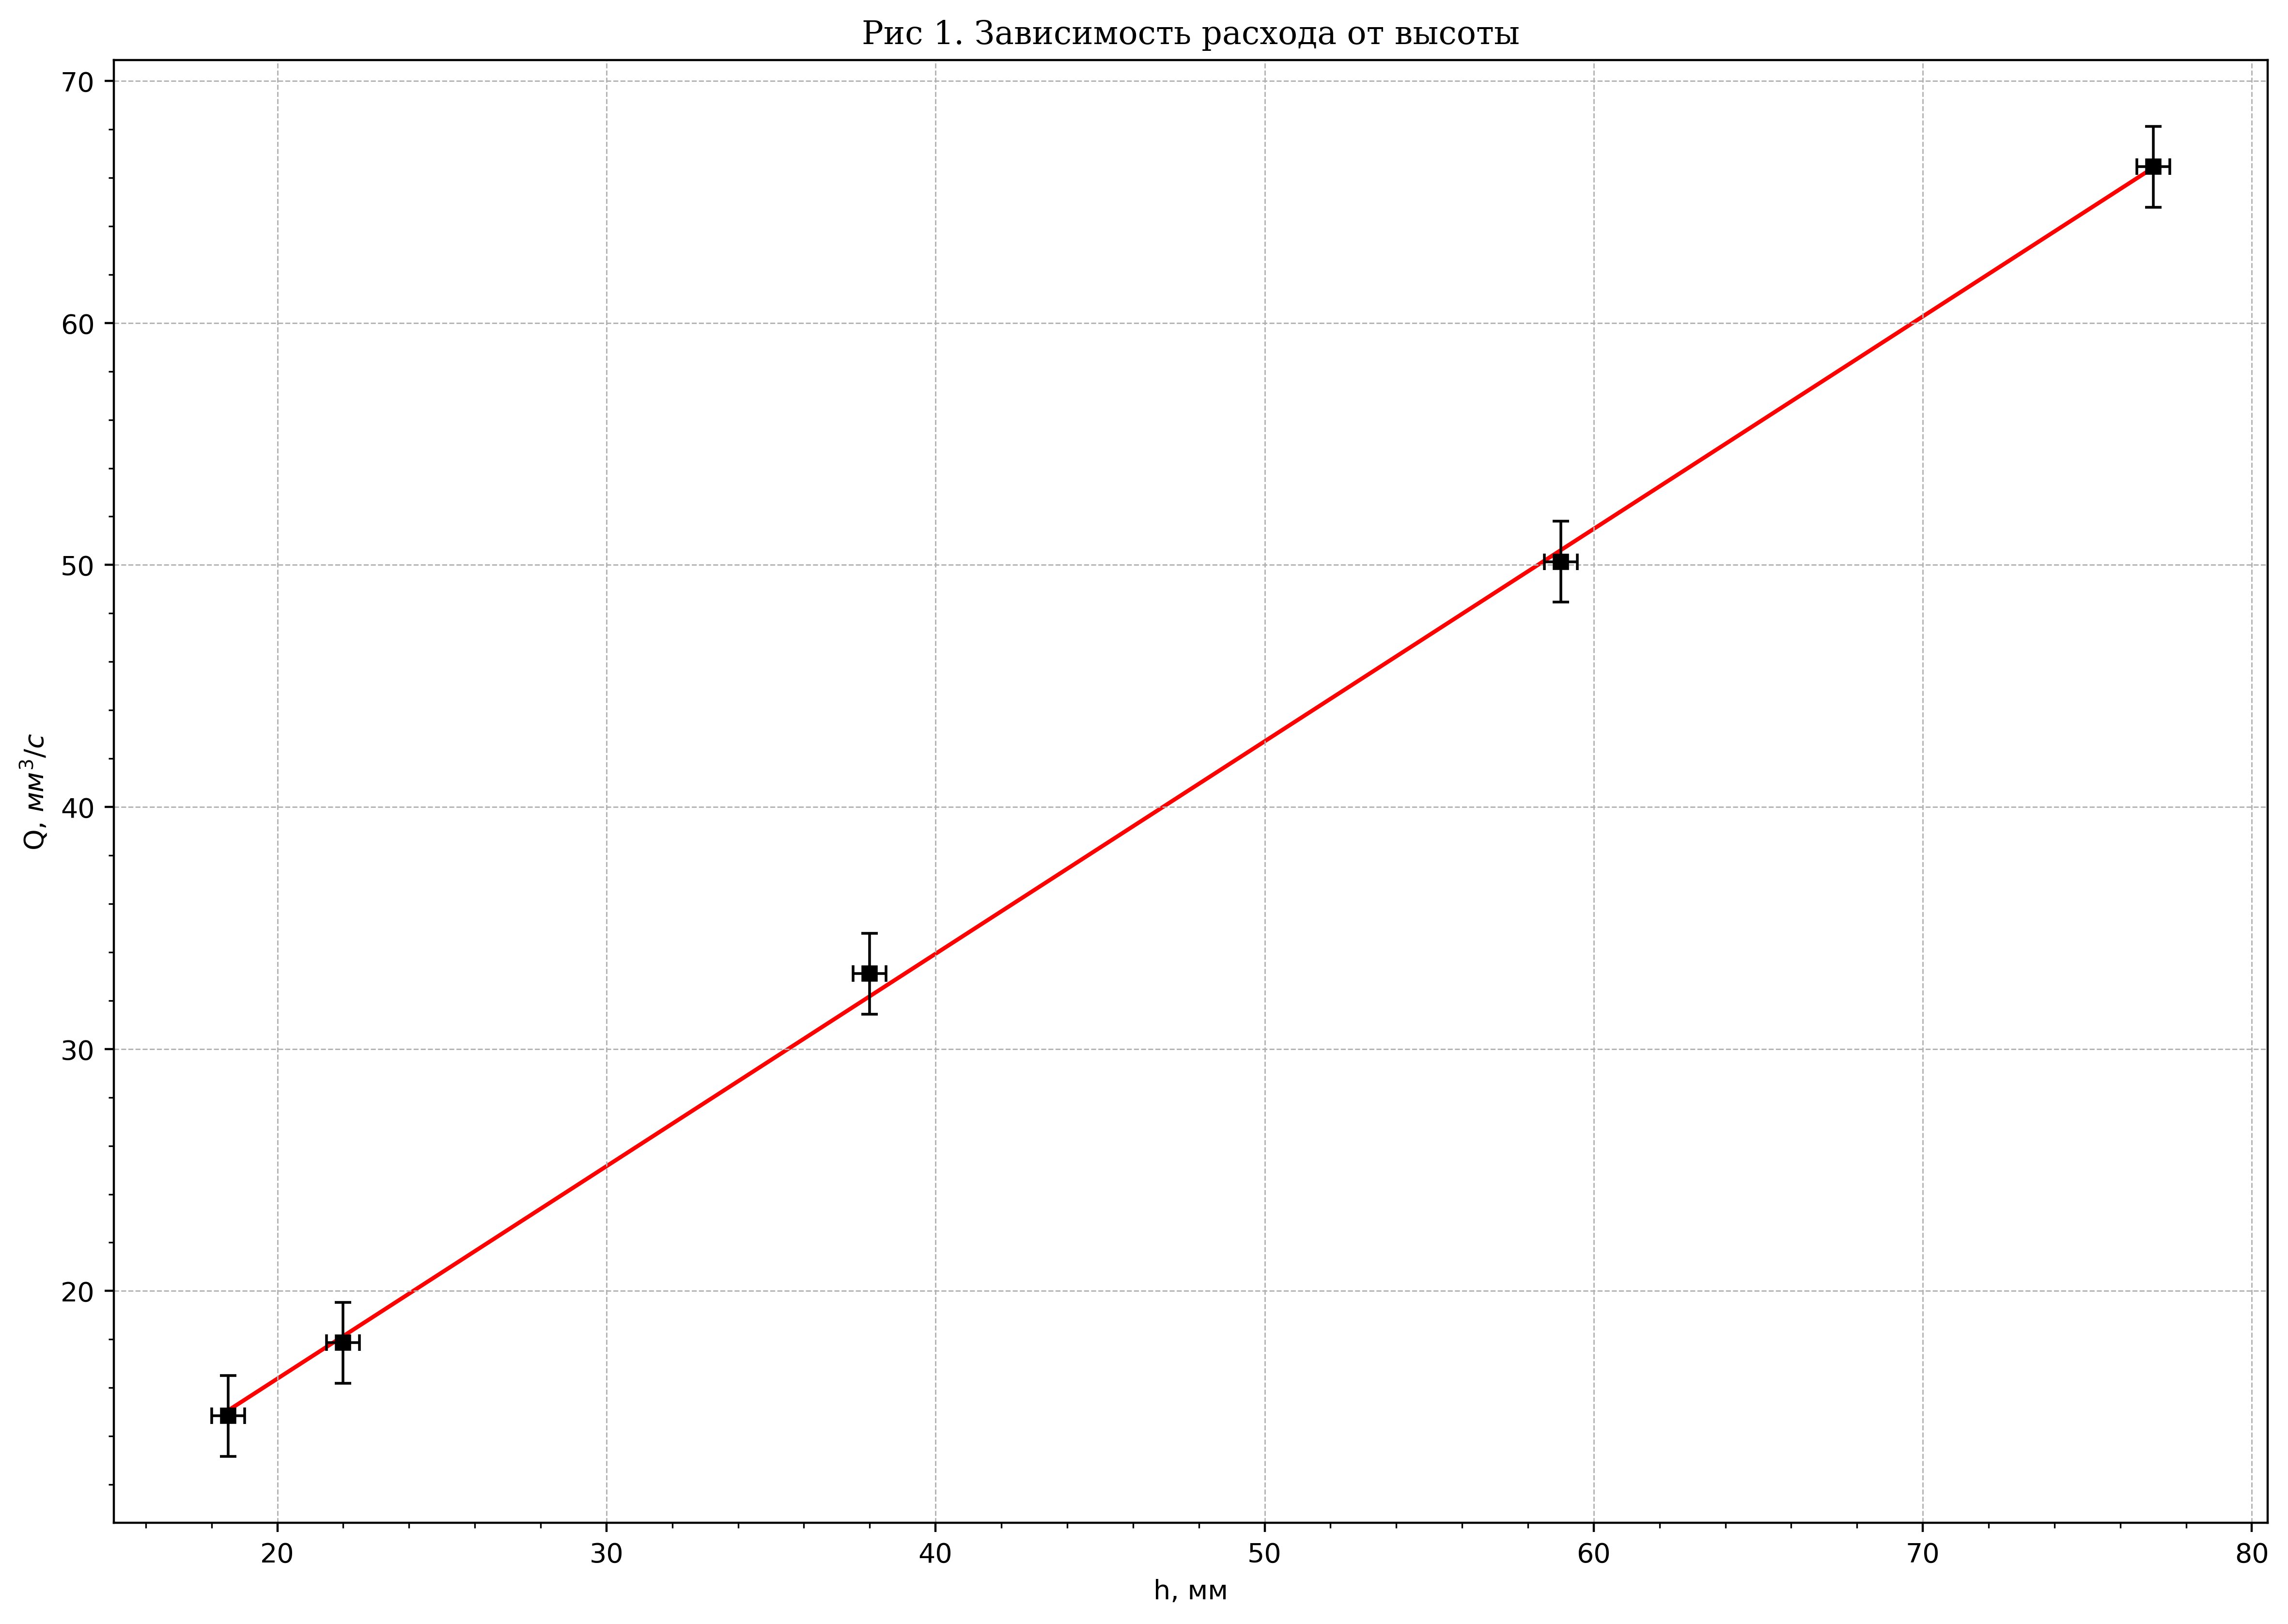

In [2]:
FONT = {'fontname': 'DejaVu Serif'}
fig1, ax1 = plt.subplots(figsize=(11.693, 8.268), dpi=400, layout='constrained')
#spec = fig1.add_gridspec(2, 2)
#ax_up = fig1.add_subplot(spec[0, 0])
#ax_down = fig1.add_subplot(spec[0, 1])
#ax_common = fig1.add_subplot(spec[1, :])
ax1.minorticks_on()
ax1.grid(which='major', linestyle='--', linewidth=0.5)
ax1.set_xlabel('h, мм')
ax1.set_ylabel('Q, $мм^{3}/с$') 
ax1.set_title('Рис 1. Зависимость расхода от высоты', **FONT) 

hs = np.array( [18.5, 22, 38, 59, 77] )
Qs = np.array( [14.84, 17.86, 33.11, 50.13, 66.45] )
Ps = np.array( [161.46, 195.80, 352.85, 558.96, 735.63 ] )
R = 0.77 / 2
l = 135
ns = Ps * np.pi * (R**4) / (8 * Qs * l)
print('Вязкости из числовых данных:', ns * 1000, 'Па * с(1e-3)')

sigma_V = 500
sigma_t = 0.6
dt = 301
V = 25000
sigma_Q = np.sqrt(
    np.square( sigma_V / dt ) + 
    np.square( sigma_t * V / (dt **2))
)
print(sigma_Q)
X_ERR = 0.5
Y_ERR = sigma_Q
ax1.errorbar(hs, Qs, fmt='ks', linewidth=0, markersize=5, elinewidth=1, 
    xerr=X_ERR, yerr=Y_ERR,
    capsize=3, zorder=3
)

##########################################################
(k, s_k, b, s_b) = lin_ls(hs, Qs, through_null=False)
ax1.plot(hs, hs * k + b, color='r', zorder=-1)
print('Коэффиценты прямой: k, s_k, b, s_b')
print(k, s_k, b, s_b, sep='\t')

n = np.pi * 1000 * 9.815 * (R**4) / (8 * k * l)

d = 0.77
alpha = np.pi * 1000 * 9.815 / 128
sigma_d = 0.03 # 0.06
sigma_l = 0.5
sigma_k = s_k
sigma_n = np.sqrt(
    np.square( 4 * alpha * (d**3) * sigma_d / (k * l) ) +
    np.square( alpha * (d**4) * sigma_k / (l * (k**2)) ) +
    np.square( alpha * (d**4) * sigma_l / (k * (l**2)) )
)
print(f'n = {n} +- {sigma_n}')

dh = -b / k
sigma_b = s_b
sigma_dh = np.sqrt(
    np.square( sigma_b / k ) +
    np.square( b * sigma_k / (k**2) )
)
print(f'dh = {dh} +- {sigma_dh}')

In [3]:
w_ts = np.array( [9.57, 9.97, 9.75, 9.78, 9.73] )
ten_ts = np.array( [12.05, 11.91] )
twenty_ts = np.array( [16.14, 16.33] )
thirty_ts = np.array( [22.73, 22.70] )

w_t = np.mean(w_ts)
sigma_t = np.std(w_ts, ddof=1)
print(f'w_ts = {w_t} +- {sigma_t}')

ten_t = np.mean(ten_ts)
print(f'ten_t = {ten_t} +- {sigma_t}')

twenty_t = np.mean(twenty_ts)
print(f'twenty_t = {twenty_t} +- {sigma_t}')

thirty_t = np.mean(thirty_ts)
print(f'thirty_t = {thirty_t} +- {sigma_t}')

k = 0.09842
def get_n(t, den):
    n = k * t * (9.815 / 9.807) * den
    return n

w_n = get_n(w_t, 1000)
print(w_n / 1e3, '1-e3')
print()
print(get_n(ten_t, 1019) / 1e3, get_n(twenty_t, 1042) / 1e3, get_n(thirty_t, 1065) / 1e3 )

print(n)
ten_n = n * (1019 / 1000) * (ten_t / w_t)
twenty_n = n * (1042 / 1000) * (twenty_t / w_t)
thirty_n = n * (1065 / 1000) * (thirty_t / w_t)
print(ten_n, twenty_n, thirty_n)

print()

sigma_ten_n = np.sqrt(
    np.square( (1019 / 1000) * (ten_t / w_t) * sigma_n ) +
    np.square( (1019 / 1000) * (n / w_t) * sigma_t  ) +
    np.square( (1019 / 1000) * n * (ten_t / (w_t**2)) * sigma_t )
)
print(sigma_ten_n)

sigma_twenty_n = np.sqrt(
    np.square( (1042 / 1000) * (twenty_t / w_t) * sigma_n ) +
    np.square( (1042 / 1000) * (n / w_t) * sigma_t  ) +
    np.square( (1042 / 1000) * n * (twenty_t / (w_t**2)) * sigma_t )
)
print(sigma_twenty_n)

sigma_thirty_n = np.sqrt(
    np.square( (1065 / 1000) * (thirty_t / w_t) * sigma_n ) +
    np.square( (1065 / 1000) * (n / w_t) * sigma_t  ) +
    np.square( (1065 / 1000) * n * (thirty_t / (w_t**2)) * sigma_t )
)
print(sigma_thirty_n)


def get_sigma(t, den):
    sigma = k * (9.815 / 9.807) * den * sigma_t
    return sigma

print()
print(get_sigma(w_t, 1000) / 1000)
print(get_sigma(ten_t, 1019) / 1000)
print(get_sigma(twenty_t, 1042) / 1000)
print(get_sigma(thirty_t, 1065) / 1000)

w_ts = 9.76 +- 0.1428285685708571
ten_t = 11.98 +- 0.1428285685708571
twenty_t = 16.235 +- 0.1428285685708571
thirty_t = 22.715 +- 0.1428285685708571
0.9613627865810134 1-e3

1.2024540554018557 1.66631652494147 2.3828671944164874
0.7145798705638589
0.8937827376529482 1.238571185957544 1.7711824871156585

0.14071267126353842
0.1947395966252824
0.2782683340404035

0.014068654783263988
0.014335959224146004
0.014659538284161076
0.014983117344176147
